In [3]:
# Import Libraries
# Numerical
import numpy as np
import pandas as pd

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns


### Pre-defined Functions

In [17]:
def pie_subplots(data_df):
    # Define the layout of subplots
    # Determine the number of subplot rows/columns needed
    num_columns = len(data_df.columns)
    # For simplicity, creating a square layout or as close to square as possible
    n_cols = int(np.ceil(np.sqrt(num_columns)))
    n_rows = int(np.ceil(num_columns / n_cols))

    # Creating the figure and axes for subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7*n_rows, 3*n_cols))

    # Iterate over each column to plot
    for i, column in enumerate(data_df.columns):
        # Aggregate data
        data = data_df[column].value_counts()
    
        # Check if axes is a single-dimensional array
        if n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            # For a 2D array of subplots, index with row and column
            row, col = i // n_cols, i % n_cols
            ax = axes[row, col]
    
        # Plot pie chart on the correct axis
        ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Pie Chart for {column}')

    plt.tight_layout()
    plt.show()


## 1.0 Load Datasets

In [4]:
data_key = pd.read_csv("data/QUESTION_KEY.csv")
data_key.head()

,Question Order,Question,Survey Section,Question Type,Answer Choices,Notes
0,1,What is your age?,Background Information,Single select,"<18 years old, 18-24, 25-34, 35-44, 45-54, 55-...",NaN
1,2,How many cups of coffee do you typically drink...,Background Information,Single select,"Less than 1, 1, 2, 3, 4, More than 4",NaN
2,3,Where do you typically drink coffee?,Background Information,Multiple selection,"None of these, At home, At a cafe, On the go, ...",NaN
3,4,"On the go, where do you typically purchase cof...",Background Information,Multiple selection,"Other, Drive-thru, Specialty coffee shop, Nati...","Only available if ""On the go"" was selected in ..."
4,5,Where else do you purchase coffee?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."


In [5]:
data = pd.read_csv("data/GACTT_RESULTS_ANONYMIZED_v2.csv", sep=',')
data.head()

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Education Level,Ethnicity/Race,Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.0 Data Exploration

In [6]:
data_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Question Order  56 non-null     int64 
 1   Question        56 non-null     object
 2   Survey Section  56 non-null     object
 3   Question Type   56 non-null     object
 4   Answer Choices  46 non-null     object
 5   Notes           10 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 111 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(90)
memory usage: 3.4+ MB


Separate data into participant deomgraphics, basic survey info, and coffee related info

In [31]:
desc_columns = [1,2, 89, 105, 106, 107, 108, 109, 110]
desc_df = data.iloc[:, desc_columns]
survey_columns = [20, 29, 65, 66, 67, 68, 69, 90, 98, 99, 100, 101, 102, 103, 104]
survey_df = data.iloc[:, survey_columns]
survey_enc_columns = [3,9,21,31, 38, 48,57,91]
coffee_survey_df = data.iloc[:, survey_enc_columns + survey_enc_columns]

### 2.1A Participant Descriptive Information

In [32]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   What is your age?                                        4011 non-null   object
 1   How many cups of coffee do you typically drink per day?  3949 non-null   object
 2   Do you work from home or in person?                      3524 non-null   object
 3   Gender                                                   3523 non-null   object
 4   Education Level                                          3438 non-null   object
 5   Ethnicity/Race                                           3418 non-null   object
 6   Employment Status                                        3419 non-null   object
 7   Number of Children                                       856 non-null    object
 8   Political Affiliation                  

In [33]:
desc_df.describe().T

,count,unique,top,freq
What is your age?,4011,7,25-34 years old,1986
How many cups of coffee do you typically drink per day?,3949,6,2,1663
Do you work from home or in person?,3524,3,I primarily work from home,1592
Gender,3523,5,Male,2524
Education Level,3438,6,Bachelor's degree,1759
Ethnicity/Race,3418,6,White/Caucasian,2626
Employment Status,3419,6,Employed full-time,2708
Number of Children,856,4,2,402
Political Affiliation,3289,4,Democrat,1768


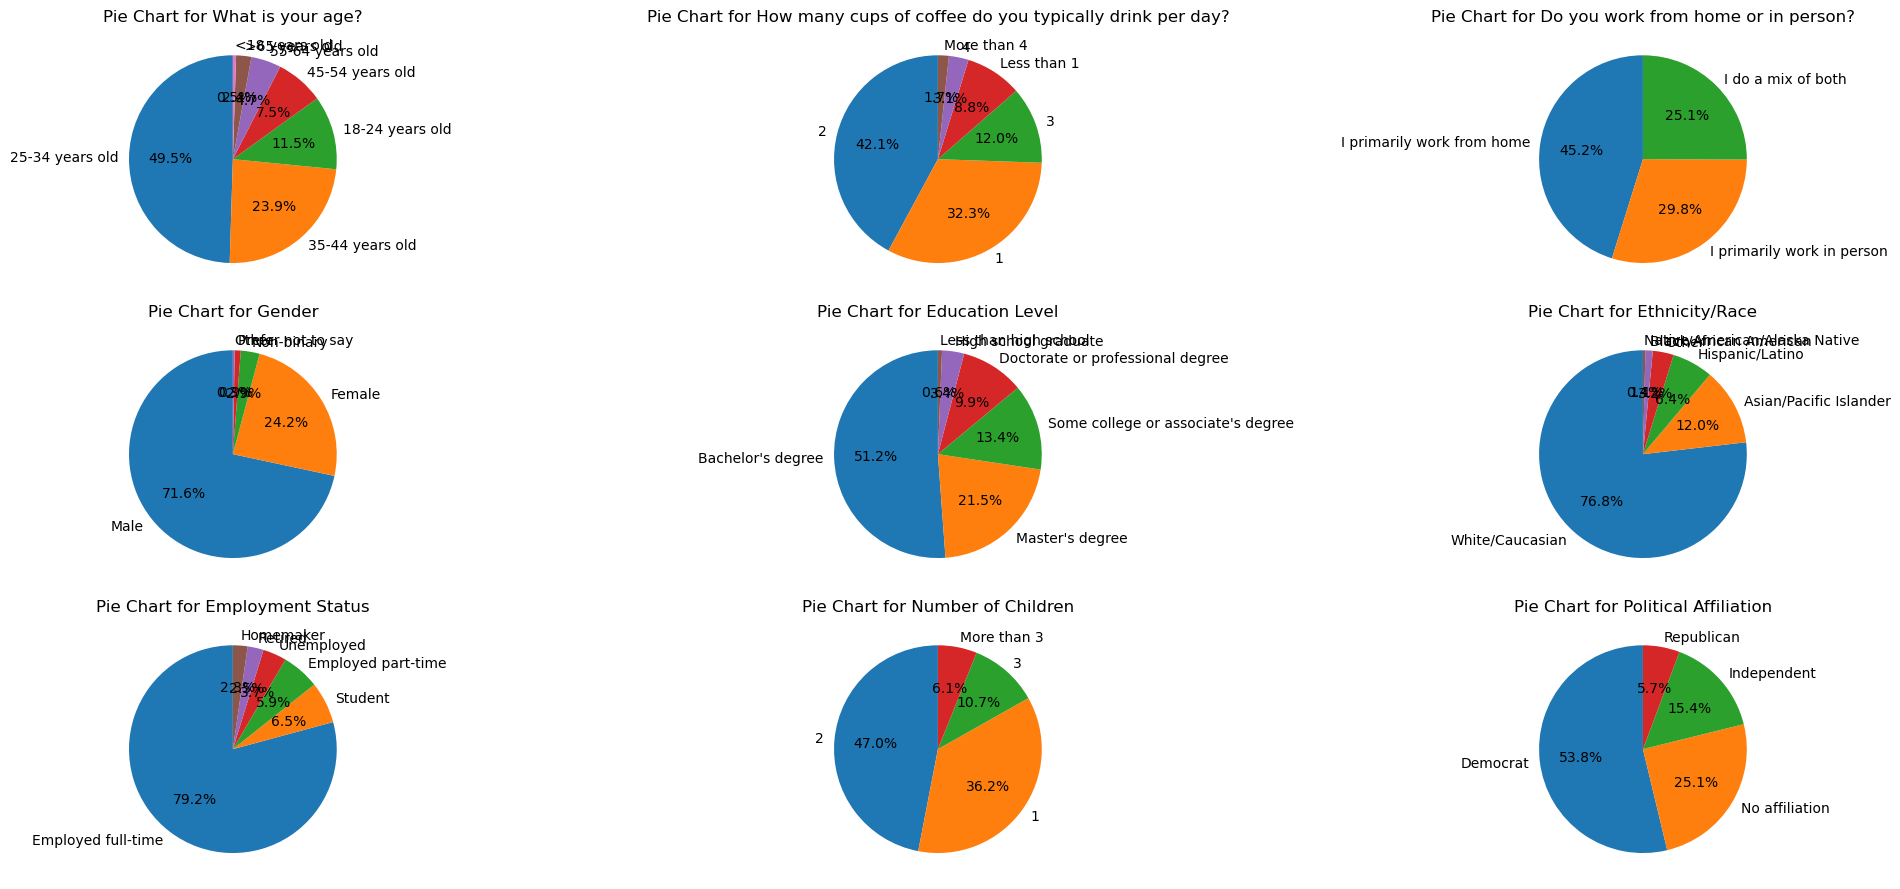

In [34]:
pie_subplots(desc_df)

## 2.1B Survey Results

In [24]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 16 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   How else do you brew coffee at home?                                                              678 non-null    object 
 1   What is your favorite coffee drink?                                                               3980 non-null   object 
 2   Before today's tasting, which of the following best described what kind of coffee you like?       3958 non-null   object 
 3   How strong do you like your coffee?                                                               3916 non-null   object 
 4   What roast level of coffee do you prefer?                                                         3940 non-null   object 
 5  

In [29]:
survey_df.iloc[:,6].head(15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    7.0
Name: Lastly, how would you rate your own coffee expertise?, dtype: float64

In [25]:
survey_df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Lastly, how would you rate your own coffee expertise?",3938.0,5.693499,1.948867,1.0,5.0,6.0,7.0,10.0


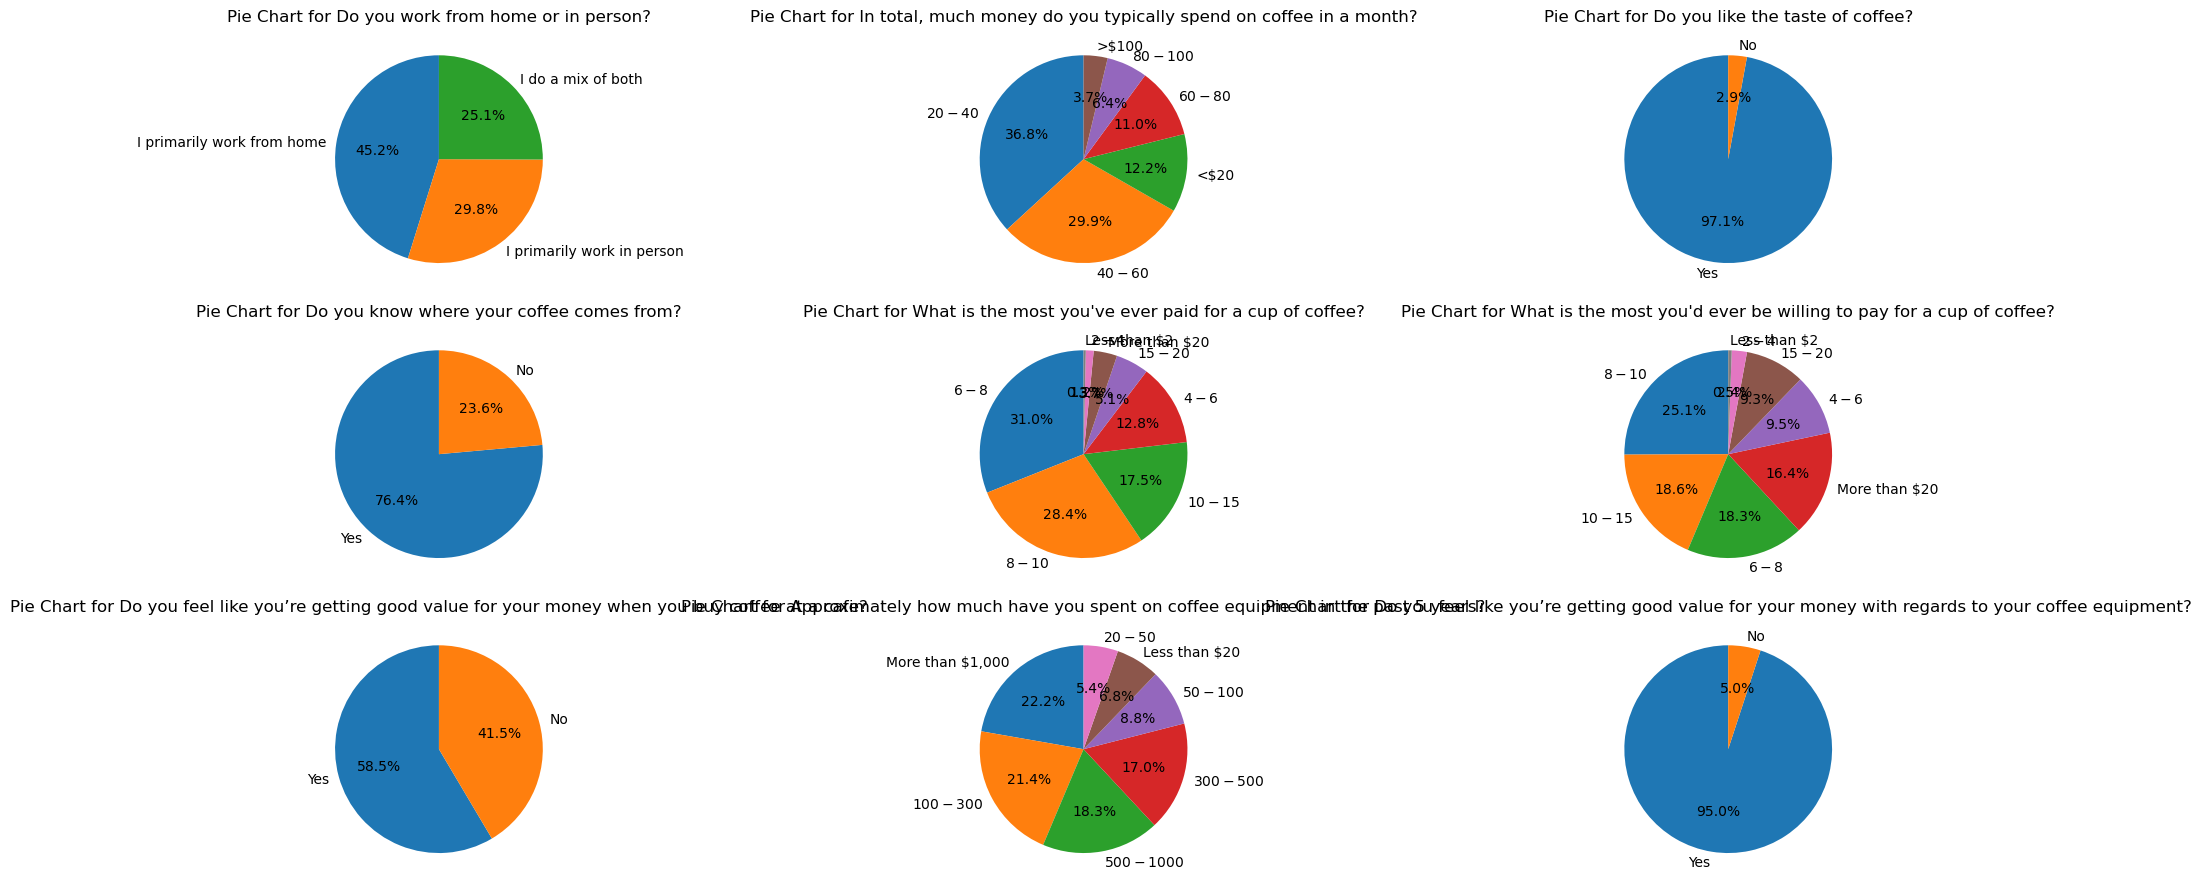

In [30]:
pie_subplots(survey_df.iloc[:, 7:])